# Imports and settings

In [1]:
### Do the imports -- no need to change this
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import sys

In [2]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
torch.manual_seed(0)

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:

env = gym.make('CartPole-v0')
seed = 0
env.reset(seed=seed)

c:\Users\Noé\Documents\EPFL\RL\project\RLHF_EGGang\.venv\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

In [5]:
from utils.classes import Policy

import utils.classes
torch.serialization.add_safe_globals([getattr, torch.nn.modules.linear.Linear, utils.classes.Policy])


# Testing baselines for REINFORCE

In [6]:
from utils.baselines import naive_baseline, baseline_1, baseline_2

from utils.reinforce import reinforce_rwd2go, reinforce_rwd2go_baseline

In [7]:
np.bool8 = bool
run=False

if run:
    # naive baseline
    policy_naive_baseline = Policy().to(device)
    optimizer_naive_baseline = optim.Adam(policy_naive_baseline.parameters(), lr=1e-2)
    scores_naive_baseline = reinforce_rwd2go_baseline(policy_naive_baseline, optimizer_naive_baseline, seed=seed, baseline=naive_baseline, env=env, early_stop=True, n_episodes=200)

    env = gym.make('CartPole-v0')


    # baseline 1
    policy_baseline_1 = Policy().to(device)
    optimizer_baseline_1 = optim.Adam(policy_baseline_1.parameters(), lr=1e-2)
    scores_baseline_1 = reinforce_rwd2go_baseline(policy_baseline_1, optimizer_baseline_1, seed=seed, baseline=baseline_1, env=env, early_stop=True, n_episodes=200)

    env = gym.make('CartPole-v0')

    # baseline 2
    policy_baseline_2 = Policy().to(device)
    optimizer_baseline_2 = optim.Adam(policy_baseline_2.parameters(), lr=1e-2)
    scores_baseline_2 = reinforce_rwd2go_baseline(policy_baseline_2, optimizer_baseline_2, seed=seed, baseline=baseline_2, env=env, early_stop=True, n_episodes=200)


In [8]:
if run:    
### Plot the learning progress

    # Create the plot
    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(111)

    # Plot the scores with specified colors and labels
    #ax.plot(np.arange(1, len(scores_rwd2go) + 1), scores_rwd2go, color='green', label='No Baseline')
    ax.plot(np.arange(1, len(scores_baseline_1) + 1), scores_baseline_1, color='blue', label='Baseline 1')
    ax.plot(np.arange(1, len(scores_baseline_2) + 1), scores_baseline_2, color='red', label='Baseline 2')
    ax.plot(np.arange(1, len(scores_naive_baseline) + 1), scores_naive_baseline, color='black', label='Naive Baseline')

    # Set the labels with a larger font size
    ax.set_ylabel('Total reward (= time balanced)', fontsize=20)
    ax.set_xlabel('Episode #', fontsize=20)

    # Set the tick labels to a larger font size
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Add a legend with a specified font size
    ax.legend(fontsize=20)

    # Show the plot
    plt.show()

# Generating the preference dataset

In [9]:
from utils.generate_preference_dataset import generate_trajectories


In [10]:
# Policy saving

np.bool8 = bool
seed = 0
env = gym.make('CartPole-v0')
env.reset(seed=seed)
target_score = 10
n_episodes = 100
print_every = 100
max_t = 1000
baseline = naive_baseline

example_policy = Policy().to(device)
optimizer_baseline_1 = optim.Adam(example_policy.parameters(), lr=1e-2)
example_scores = reinforce_rwd2go_baseline(example_policy, optimizer_baseline_1, seed=seed, env=env, target_score=target_score, baseline=baseline, early_stop=False, n_episodes=n_episodes, max_t=max_t, print_every=print_every, save_models_every=False)

Episode 0	Average Score: 27.00
Episode 0	Current Score: 27.00
Episode 0	Current Score: 27.00
Episode 1	Current Score: 11.00
Episode 3	Current Score: 29.00
Episode 6	Current Score: 10.00
Episode 11	Current Score: 10.00
Episode 12	Current Score: 10.00
Episode 15	Current Score: 11.00
Episode 21	Current Score: 59.00
Episode 25	Current Score: 60.00
Episode 50	Current Score: 67.00
Episode 54	Current Score: 94.00
Episode 72	Current Score: 108.00
Episode 86	Current Score: 109.00
Episode 91	Current Score: 128.00
Episode 100	Average Score: 43.52
Episode 100	Current Score: 82.00


# Loading policies (manual intervention required)

In [11]:
PATH = os.path.abspath(os.getcwd())

# TO COMPLETE, choose the file names of the desired policies

pi1_path = os.path.join(PATH, 'saved_policies', 'model_91.pt')

pi2_path = os.path.join(PATH, 'saved_policies', 'model_11.pt')

In [12]:
# Generate preference dataset



pref_dataset_size = 100
pi1 = Policy().to(device)
pi1.load_state_dict(torch.load(pi1_path, weights_only=True))

env = gym.make('CartPole-v0')
trajectories_rewards_pi1, trajectories_states_pi1, trajectories_actions_pi1 = generate_trajectories(pi1, pref_dataset_size, env=env, max_t=1000, seed = seed, dim_state=4)

pi2 = Policy().to(device)
pi2.load_state_dict(torch.load(pi2_path, weights_only=True))

env = gym.make('CartPole-v0')
trajectories_rewards_pi2, trajectories_states_pi2, trajectories_actions_pi2 = generate_trajectories(pi2, pref_dataset_size, env=env, max_t=1000, seed = seed, dim_state=4)



c:\Users\Noé\Documents\EPFL\RL\project\RLHF_EGGang\.venv\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Trajectory:  0
Trajectory:  10
Trajectory:  20
Trajectory:  30
Trajectory:  40
Trajectory:  50
Trajectory:  60
Trajectory:  70
Trajectory:  80
Trajectory:  90
Trajectory:  0
Trajectory:  10
Trajectory:  20
Trajectory:  30
Trajectory:  40
Trajectory:  50
Trajectory:  60
Trajectory:  70
Trajectory:  80
Trajectory:  90


In [13]:
avg_pi1 = np.mean(trajectories_rewards_pi1)
avg_pi2 = np.mean(trajectories_rewards_pi2)
print(avg_pi1, avg_pi2)

97.14 17.0


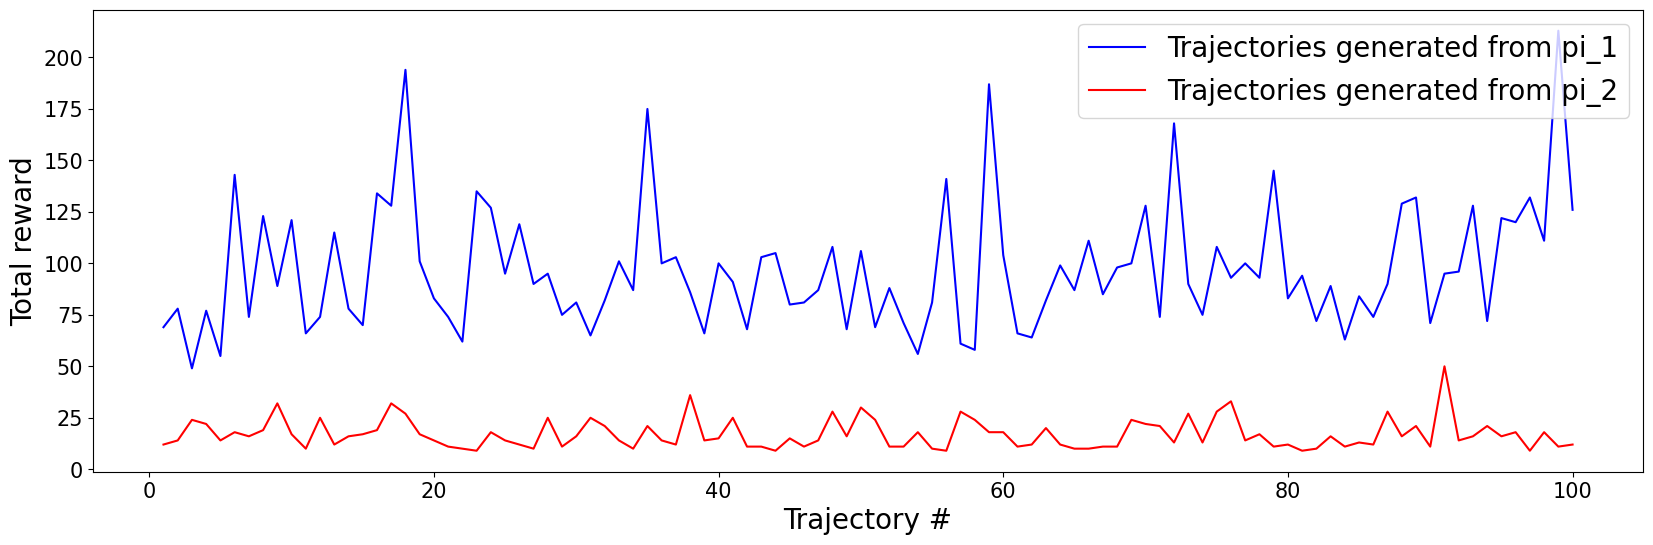

In [14]:
### Plot the learning progress

# Create the plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

# Plot the scores with specified colors and labels
#ax.plot(np.arange(1, len(scores_rwd2go) + 1), scores_rwd2go, color='green', label='No Baseline')
ax.plot(np.arange(1, len(trajectories_rewards_pi1) + 1), trajectories_rewards_pi1, color='blue', label='Trajectories generated from pi_1')
ax.plot(np.arange(1, len(trajectories_rewards_pi2) + 1), trajectories_rewards_pi2, color='red', label='Trajectories generated from pi_2')

# Set the labels with a larger font size
ax.set_ylabel('Total reward', fontsize=20)
ax.set_xlabel('Trajectory #', fontsize=20)

# Set the tick labels to a larger font size
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend with a specified font size
ax.legend(fontsize=20)

# Show the plot
plt.show()